# Predicting the Success of a Kickstarter Campaign
Part A. Initial exploratory data analysis (EDA).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline

# import sqlalchemy
from sqlalchemy import create_engine
# from flask_sqlalchemy import SQLAlchemy

# from sklearn import naive_bayes
# from sklearn.naive_bayes import GaussianNB, BernoulliNB,MultinomialNB
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
# from sklearn.svm import SVC, LinearSVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
# from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
# from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score
# from sklearn.metrics import average_precision_score, precision_recall_curve, auc
# from sklearn.learning_curve import learning_curve
# from sklearn.cross_validation import train_test_split, cross_val_predict
# from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
# from sklearn.preprocessing import label_binarize, scale, StandardScaler
# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.pipeline import make_pipeline

# from sklearn.datasets import make_classification
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
#                               GradientBoostingClassifier)
# from sklearn.preprocessing import OneHotEncoder

import datetime
import warnings
import os

warnings.filterwarnings("ignore") #, category=DeprecationWarning)

In [2]:
# env variable at tensorflow1.4 per https://conda.io/docs/user-guide/tasks/manage-environments.html#saving-environment-variables
# and https://vsupalov.com/flask-sqlalchemy-postgres/

def get_env_variable(name):
    try:
        return os.environ[name]
    except KeyError:
        message = "Expected environment variable '{}' not set.".format(name)
        raise Exception(message)

# the values of those depend on your setup
POSTGRES_URL = get_env_variable("POSTGRES_URL")
POSTGRES_USER = get_env_variable("POSTGRES_USER")
POSTGRES_PW = get_env_variable("POSTGRES_PW")
POSTGRES_DB = get_env_variable("POSTGRES_DB")

In [3]:
DB_URL = 'postgresql+psycopg2://{user}:{pw}@{url}/{db}'.format(user=POSTGRES_USER,pw=POSTGRES_PW,url=POSTGRES_URL,db=POSTGRES_DB)

In [4]:
engine_var = DB_URL
engine = create_engine(engine_var)

In [5]:
df = pd.read_pickle('data/kickstarter_data_ds2.pkl')
# df = pd.read_sql_query('''SELECT * FROM kickstarter_data_ds2''',engine)
# pd.read_sql_query('''SELECT state, main_category, main_category, currency, currency, deadline, launched, usd_goal_real, usd_pledged_real FROM kickstarter_data_ds2 LIMIT 5''',engine)
df['idx'] = df['id']
df = df.set_index('idx')
# df['state'] = df['state'].replace({'failed': 0, 'successful': 1}).astype(int)
# df['spotlight'] = df['spotlight'].replace({False: 0, True: 1}).astype(int)
df = df.drop(['spotlight'],1)
print(df.shape)
df.head()

(163425, 18)


,id,name,state,category_main,category_name,backers_count,pct_goal_achieved,usd_pledged,usd_goal,country,currency,campaign_length,deadline,launched,created,staff_pick,creator_name,blurb_length
idx,,,,,,,,,,,,,,,,,,
1396766240,1396766240,Ripple Playing Cards - Printed by USPCC,0,games,Playing Cards,131,0.3,3387.000000,9999.000000,US,USD,38,2018-01-12,2017-12-05,2017-10-08,0,B.Y. Eidelman,16
2065169465,2065169465,Cotton-Top Pastries,1,food,Small Batch,99,1.3,9858.000000,7500.000000,US,USD,30,2018-01-12,2017-12-13,2017-12-12,1,Holly Weist,5
1647325451,1647325451,Code Switch,1,film_and_video,Horror,34,1.5,4611.000000,3000.000000,US,USD,32,2018-01-12,2017-12-11,2017-11-10,0,Alba Roland,23
727157486,727157486,Rain Dog Farm,0,food,Farms,49,0.3,4741.000000,18000.000000,US,USD,38,2018-01-12,2017-12-05,2017-11-28,1,Charlie Wainger,9
1756145145,1756145145,WANGTA: a novel,1,publishing,Fiction,13,1.0,427.185132,427.185132,CA,CAD,21,2018-01-12,2017-12-22,2017-12-18,0,D. H. de Bruin,22


In [6]:
df.corr().sort_values('state')

,id,state,backers_count,pct_goal_achieved,usd_pledged,usd_goal,campaign_length,staff_pick,blurb_length
campaign_length,0.005133,-0.089709,0.005262,-0.005714,0.015575,0.024598,1.000000,-0.009770,0.037894
usd_goal,0.003757,-0.033841,0.014228,-0.000685,0.016147,1.000000,0.024598,-0.005367,-0.002520
id,1.000000,-0.003156,-0.001980,-0.001269,-0.000468,0.003757,0.005133,0.001558,0.000146
blurb_length,0.000146,0.001104,-0.013996,-0.002498,-0.012055,-0.002520,0.037894,-0.021259,1.000000
pct_goal_achieved,-0.001269,0.015741,0.011325,1.000000,0.008084,-0.000685,-0.005714,0.001501,-0.002498
usd_pledged,-0.000468,0.107837,0.810157,0.008084,1.000000,0.016147,0.015575,0.143184,-0.012055
backers_count,-0.001980,0.116073,1.000000,0.011325,0.810157,0.014228,0.005262,0.152846,-0.013996
staff_pick,0.001558,0.257915,0.152846,0.001501,0.143184,-0.005367,-0.009770,1.000000,-0.021259
state,-0.003156,1.000000,0.116073,0.015741,0.107837,-0.033841,-0.089709,0.257915,0.001104


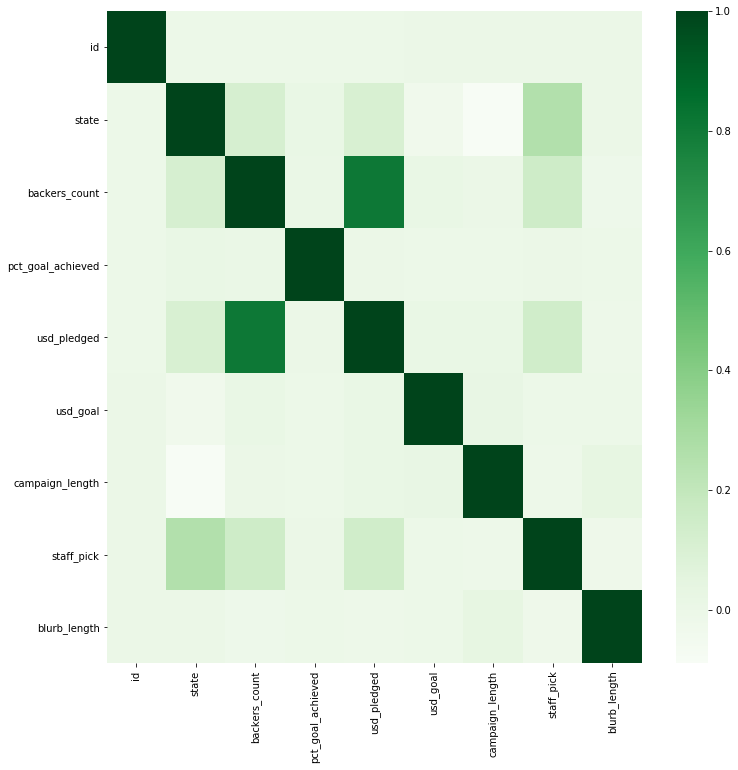

In [7]:
plt.figure(figsize = (12,12))
# sns.heatmap(df.corr(), cmap = 'coolwarm')
sns.heatmap(df.corr(), cmap = "Greens" )
plt.savefig('charts/featuresheatmap.png')
# plot_corr_matrix(df)
# sns.heatmap(df.corr(),linecolor = "coolwarm")

In [8]:
start_date = datetime.datetime.strptime('2017-06-30', "%Y-%m-%d").date()

df = df[df['launched'] >= start_date] # filter from start date to current
df.shape

(8524, 18)

In [9]:
# df_success = df[df['state'] == 1]
# df_fail = df[df['state'] == 0]
# print(df_success.shape)
# df_success.head()

In [10]:
# print(df_fail.shape)
# df_fail.head()

In [11]:
df.category_main.unique()

array(['games', 'food', 'film_and_video', 'publishing', 'technology',
       'fashion', 'art', 'comics', 'music', 'crafts', 'dance', 'design',
       'photography', 'theater', 'journalism'], dtype=object)

In [12]:
# sns.set_style('whitegrid')
# df['usd_pledged'].hist(bins=30)
# plt.xlabel('Pledged')

In [13]:
# df_success.pct_goal_achieved.mean()
# df_fail.pct_goal_achieved.mean()

In [14]:
df.columns

Index(['id', 'name', 'state', 'category_main', 'category_name',
       'backers_count', 'pct_goal_achieved', 'usd_pledged', 'usd_goal',
       'country', 'currency', 'campaign_length', 'deadline', 'launched',
       'created', 'staff_pick', 'creator_name', 'blurb_length'],
      dtype='object')

In [15]:
# df['category_name'].unique()
df.groupby('state').nunique()

,id,name,state,category_main,category_name,backers_count,pct_goal_achieved,usd_pledged,usd_goal,country,currency,campaign_length,deadline,launched,created,staff_pick,creator_name,blurb_length
state,,,,,,,,,,,,,,,,,,
0,3620,3620,1,15,113,174,11,1966,1319,22,14,61,182,178,458,2,3535,32
1,4904,4902,1,15,135,797,212,4563,2082,22,14,60,186,181,512,2,4651,31


In [16]:
df['country'].unique()

array(['US', 'CA', 'GB', 'AT', 'HK', 'FR', 'IT', 'NL', 'ES', 'AU', 'BE',
       'MX', 'DE', 'NZ', 'SG', 'SE', 'DK', 'NO', 'IE', 'CH', 'LU', 'JP'], dtype=object)

In [17]:
# Country Dictionary
country_dict = {}
country_list = ['US', 'CA', 'GB', 'AT', 'HK', 'FR', 'IT', 'NL', 'ES', 'AU', 'BE',
       'MX', 'DE', 'NZ', 'SG', 'SE', 'DK', 'NO', 'IE', 'CH', 'LU', 'JP']#,'Other']
for country in country_list:
    if country == 'All':
        df_c = df
    elif country == 'Other':
        df_c = df[~df.country.isin(country_list)]
    else:
        df_c = df[df['country'] == country]
    df_c = df_c.dropna()
    state_mean = df_c['state'].mean()
    backers_mean = df_c['backers_count'].mean()
    pledged_mean = df_c['usd_pledged'].mean()
    goal_mean = df_c['usd_goal'].mean()
    campaign_mean = df_c['campaign_length'].mean()
    staff_pick_mean = df_c['staff_pick'].mean()
    blurb_mean = df_c['blurb_length'].mean()

    state_total = df_c['state'].sum()
    backers_total = df_c['backers_count'].sum()
    pledged_total = df_c['usd_pledged'].sum()
    goal_total = df_c['usd_goal'].sum()
    pct_goal_achieved = pledged_total/goal_total
    
    country_dict[country] = {"state_mean":state_mean, "backers_mean": backers_mean, "pledged_mean":pledged_mean, 
                         "goal_mean":goal_mean, "campaign_mean":campaign_mean, "staff_pick_mean":staff_pick_mean, 
                         "blurb_mean":blurb_mean, "state_total": state_total, "backers_total":backers_total,
                            "pledged_total":pledged_total,"goal_total":goal_total,"pct_goal_achieved": pct_goal_achieved}

In [18]:
cd = pd.DataFrame(country_dict).T
cd['country'] = cd.index
cd = cd.sort_values(['pledged_total'],ascending=[False])
cd

,backers_mean,backers_total,blurb_mean,campaign_mean,goal_mean,goal_total,pct_goal_achieved,pledged_mean,pledged_total,staff_pick_mean,state_mean,state_total,country
US,151.810335,775599.0,18.962419,31.362498,41915.369348,2.141456e+08,0.374491,15696.928272,8.019561e+07,0.133098,0.615972,3147.0,US
GB,119.602285,115177.0,18.761163,30.046729,20852.831863,2.008128e+07,0.373207,7782.423427,7.494474e+06,0.159917,0.698858,673.0,GB
CA,159.189189,64790.0,18.503686,31.670762,44441.274073,1.808760e+07,0.230673,10251.409880,4.172324e+06,0.174447,0.697789,284.0,CA
AU,196.064516,42546.0,18.612903,31.294931,24781.150594,5.377510e+06,0.614001,15215.649353,3.301796e+06,0.161290,0.635945,138.0,AU
HK,261.455882,17779.0,18.132353,33.000000,24130.676667,1.640886e+06,1.382260,33354.867211,2.268131e+06,0.102941,0.720588,49.0,HK
DE,118.468927,20969.0,17.853107,30.186441,12836.371943,2.272038e+06,0.866158,11118.332370,1.967945e+06,0.152542,0.519774,92.0,DE
FR,140.251748,20056.0,18.580420,34.370629,11833.731710,1.692224e+06,1.007906,11927.283519,1.705602e+06,0.160839,0.622378,89.0,FR
SE,255.376812,17621.0,18.260870,31.289855,182047.473052,1.256128e+07,0.094421,17189.042345,1.186044e+06,0.144928,0.623188,43.0,SE
CH,134.487179,5245.0,17.769231,32.871795,17677.138559,6.894084e+05,1.492952,26391.116907,1.029254e+06,0.102564,0.512821,20.0,CH
ES,86.309091,9494.0,18.927273,33.263636,17936.054282,1.972966e+06,0.519052,9309.737259,1.024071e+06,0.109091,0.563636,62.0,ES


In [19]:
# ax = sns.boxplot(x='country',y='state_mean',data=cd,palette='rainbow')

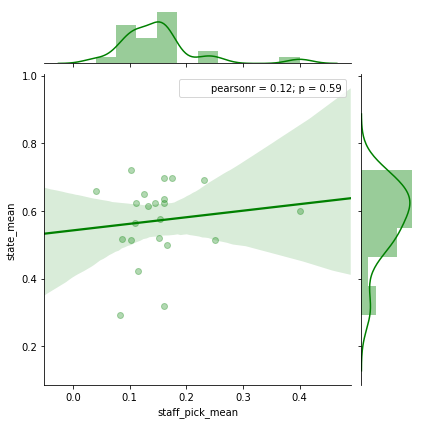

In [20]:
sns.jointplot(x='staff_pick_mean',y='state_mean', kind='reg',color='g',data=cd,scatter_kws={'alpha':0.3})

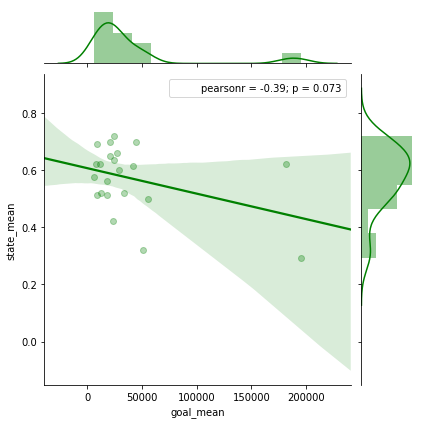

In [21]:
sns.jointplot(x='goal_mean',y='state_mean', kind='reg',color='g',data=cd,scatter_kws={'alpha':0.3})

In [22]:
# df['category_main'].unique()

In [23]:
# Main Category Dictionary
mcat_dict = {}
mcat_list = ['games', 'food', 'film_and_video', 'publishing', 'technology',
       'fashion', 'art', 'comics', 'music', 'crafts', 'dance', 'design',
       'photography', 'theater', 'journalism'] 
for mcat in mcat_list:
    if mcat == 'All':
        df_d = df
    elif mcat == 'Other':
        df_d = df[~df.category_main.isin(mcat_list)]
    else:
        df_d = df[df['category_main'] == mcat]
    df_d = df_d.dropna()
    cat_count = df_d['id'].count()
    state_mean = df_d['state'].mean()
    backers_mean = df_d['backers_count'].mean()
    pledged_mean = df_d['usd_pledged'].mean()
    goal_mean = df_d['usd_goal'].mean()
    campaign_mean = df_d['campaign_length'].mean()
    staff_pick_mean = df_d['staff_pick'].mean()
    blurb_mean = df_d['blurb_length'].mean()

    state_total = df_d['state'].sum()
    backers_total = df_d['backers_count'].sum()
    pledged_total = df_d['usd_pledged'].sum()
    goal_total = df_d['usd_goal'].sum()
    pct_goal_achieved = pledged_total/goal_total
    
    mcat_dict[mcat] = {"state_mean":state_mean, "backers_mean": backers_mean, "pledged_mean":pledged_mean, 
                         "goal_mean":goal_mean, "campaign_mean":campaign_mean, "staff_pick_mean":staff_pick_mean, 
                         "blurb_mean":blurb_mean, "state_total": state_total, "backers_total":backers_total,
                            "pledged_total":pledged_total,"goal_total":goal_total,"pct_goal_achieved": pct_goal_achieved}

In [24]:
mcd = pd.DataFrame(mcat_dict).T
mcd = pd.DataFrame(mcd)
mcd['category'] = mcd.index
mcd = mcd.sort_values(['pledged_total'],ascending=[False])
mcd

,backers_mean,backers_total,blurb_mean,campaign_mean,goal_mean,goal_total,pct_goal_achieved,pledged_mean,pledged_total,staff_pick_mean,state_mean,state_total,category
technology,376.740167,316085.0,18.323004,34.398093,37651.573961,3.158967e+07,1.615410,60822.719199,5.103026e+07,0.159714,0.589988,495.0,technology
games,288.439222,177967.0,18.275527,31.079417,22263.534611,1.373660e+07,0.608683,13551.440710,8.361239e+06,0.124797,0.551053,340.0,games
fashion,96.450363,79668.0,17.261501,29.892252,30027.160398,2.480243e+07,0.332474,9983.256090,8.246170e+06,0.077482,0.723971,598.0,fashion
publishing,139.916930,133061.0,19.227129,31.089380,10574.761026,1.005660e+07,0.785149,8302.760640,7.895925e+06,0.208202,0.758149,721.0,publishing
film_and_video,86.711864,71624.0,19.549637,33.529056,196123.867438,1.619983e+08,0.043986,8626.625726,7.125593e+06,0.108959,0.501211,414.0,film_and_video
food,82.374286,57662.0,19.431429,33.002857,21522.755169,1.506593e+07,0.348279,7495.914608,5.247140e+06,0.088571,0.350000,245.0,food
comics,174.715221,106751.0,19.382979,30.106383,6349.756193,3.879701e+06,1.233579,7832.928895,4.785920e+06,0.271686,0.829787,507.0,comics
art,107.852893,65251.0,17.975207,28.411570,4976.572785,3.010827e+06,1.521622,7572.460597,4.581339e+06,0.132231,0.844628,511.0,art
music,77.438662,41662.0,19.243494,31.855019,8129.461588,4.373650e+06,0.765180,6220.500002,3.346629e+06,0.089219,0.646840,348.0,music
design,117.878049,24165.0,18.341463,29.917073,55676.912377,1.141377e+07,0.164008,9131.466013,1.871951e+06,0.219512,0.512195,105.0,design


In [25]:
df['category_name'].unique()

array(['Playing Cards', 'Small Batch', 'Horror', 'Farms', 'Fiction',
       'Nonfiction', 'Flight', 'Childrenswear', 'Ready-to-wear',
       'Television', 'Web', 'Performance Art', 'Drinks', 'Graphic Novels',
       'Music Videos', 'Hip-Hop', 'Stationery', 'Mixed Media',
       'Food Trucks', 'Comedy', 'Restaurants', 'Electronic Music',
       'Literary Spaces', 'Mobile Games', 'Cookbooks', 'Zines', 'Jazz',
       'Periodicals', 'Jewelry', 'Radio & Podcasts', 'Apps',
       "Children's Books", 'Accessories', 'DIY', 'Candles', 'Apparel',
       'Dance', '3D Printing', 'Illustration', 'Video Art',
       'Graphic Design', 'Anthologies', 'Footwear', 'Photobooks',
       'Fine Art', 'Plays', 'Translations', 'Sound', 'Latin',
       'Architecture', 'Animation', 'Spaces', 'Webseries', 'Nature',
       'Couture', 'Performances', 'Workshops', 'Movie Theaters', 'Audio',
       'World Music', 'Hardware', 'Experimental', 'Gaming Hardware',
       'Narrative Film', 'Crafts', 'Drama', 'Blues', 'Fab

In [26]:
# Subcategory Dictionary
subcat_dict = {}
subcat_list = ['Playing Cards', 'Small Batch', 'Horror', 'Farms', 'Fiction',
       'Nonfiction', 'Flight', 'Childrenswear', 'Ready-to-wear',
       'Television', 'Web', 'Performance Art', 'Drinks', 'Graphic Novels',
       'Music Videos', 'Hip-Hop', 'Stationery', 'Mixed Media',
       'Food Trucks', 'Comedy', 'Restaurants', 'Electronic Music',
       'Literary Spaces', 'Mobile Games', 'Cookbooks', 'Zines', 'Jazz',
       'Periodicals', 'Jewelry', 'Radio & Podcasts', 'Apps',
       "Children's Books", 'Accessories', 'DIY', 'Candles', 'Apparel',
       'Dance', '3D Printing', 'Illustration', 'Video Art',
       'Graphic Design', 'Anthologies', 'Footwear', 'Photobooks',
       'Fine Art', 'Plays', 'Translations', 'Sound', 'Latin',
       'Architecture', 'Animation', 'Spaces', 'Webseries', 'Nature',
       'Couture', 'Performances', 'Workshops', 'Movie Theaters', 'Audio',
       'World Music', 'Hardware', 'Experimental', 'Gaming Hardware',
       'Narrative Film', 'Crafts', 'Drama', 'Blues', 'Fabrication Tools',
       'Pop', 'Art Books', 'DIY Electronics', 'Pottery', 'Animals',
       'Ceramics', 'Academic', 'Gadgets', 'Wearables', 'Festivals',
       'Public Art', 'Vegan', 'Faith', 'Metal', 'Webcomics', 'Video',
       'Sculpture', 'Romance', 'Interactive Design', 'Fantasy',
       'Classical Music', 'Civic Design', 'Family', 'Live Games',
       'Calendars', 'Comic Books', 'Robots', 'Events', 'Thrillers',
       'Science Fiction', 'Textiles', 'Software', 'Poetry',
       'Installations', 'Camera Equipment', 'Painting', 'People',
       'Space Exploration', 'Print', 'Musical', 'Typography', 'Action',
       'Journalism', 'Immersive', 'R&B', 'Pet Fashion', 'Conceptual Art',
       'Woodworking', 'Young Adult', 'Weaving', 'Photo', 'Letterpress',
       'Puzzles', 'Punk', 'Places', 'Embroidery', "Farmer's Markets",
       'Literary Journals', 'Printing', 'Makerspaces', 'Knitting', 'Kids',
       'Video Games', 'Glass', 'Community Gardens', 'Bacon', 'Crochet',
       'Quilts', 'Residencies'] #'All','Other']
for subcat in subcat_list:
    if subcat == 'All':
        df_c = df
    elif subcat == 'Other':
        df_c = df[~df.category_name.isin(subcat_list)]
    else:
        df_c = df[df['category_name'] == subcat]
    df_c = df_c.dropna()
    main_cat = df_c['category_main'].unique()[0]
    cat_count = df_c['id'].count()
    state_mean = df_c['state'].mean()
    backers_mean = df_c['backers_count'].mean()
    pledged_mean = df_c['usd_pledged'].mean()
    goal_mean = df_c['usd_goal'].mean()
    campaign_mean = df_c['campaign_length'].mean()
    staff_pick_mean = df_c['staff_pick'].mean()
    blurb_mean = df_c['blurb_length'].mean()

    state_total = df_c['state'].sum()
    backers_total = df_c['backers_count'].sum()
    pledged_total = df_c['usd_pledged'].sum()
    goal_total = df_c['usd_goal'].sum()
    pct_goal_achieved = pledged_total/goal_total
    
    subcat_dict[subcat] = {"state_mean":state_mean, "backers_mean": backers_mean, "pledged_mean":pledged_mean, 
                         "goal_mean":goal_mean, "campaign_mean":campaign_mean, "staff_pick_mean":staff_pick_mean, 
                         "blurb_mean":blurb_mean, "state_total": state_total, "backers_total":backers_total,
                            "pledged_total":pledged_total,"goal_total":goal_total,"pct_goal_achieved": pct_goal_achieved}

In [27]:
scd = pd.DataFrame(subcat_dict).T
scd = pd.DataFrame(scd)
scd['cat_name'] = scd.index
scd = scd.sort_values(['pledged_total'],ascending=[False])
scd

,backers_mean,backers_total,blurb_mean,campaign_mean,goal_mean,goal_total,pct_goal_achieved,pledged_mean,pledged_total,staff_pick_mean,state_mean,state_total,cat_name
Hardware,600.168831,46213.0,18.051948,35.649351,3.332986e+04,2.566399e+06,4.429690,147640.943567,1.136835e+07,0.350649,1.000000,77.0,Hardware
Wearables,617.750000,61775.0,18.910000,34.700000,5.612481e+04,5.612481e+06,1.606138,90144.166343,9.014417e+06,0.080000,0.480000,48.0,Wearables
Gadgets,335.869369,74563.0,18.157658,34.914414,2.959143e+04,6.569298e+06,1.231471,36440.987434,8.089899e+06,0.063063,0.554054,123.0,Gadgets
Video Games,910.420168,108340.0,18.252101,30.504202,1.978138e+04,2.353984e+06,1.967618,38922.197501,4.631742e+06,0.512605,1.000000,119.0,Video Games
Sound,325.662162,24099.0,18.337838,34.081081,4.336393e+04,3.208931e+06,1.128478,48935.230604,3.621207e+06,0.270270,0.567568,42.0,Sound
Apparel,177.901734,30777.0,17.982659,30.653179,8.822570e+03,1.526305e+06,2.150279,18970.986035,3.281981e+06,0.121387,1.000000,173.0,Apparel
Camera Equipment,392.000000,15680.0,18.250000,33.825000,3.168163e+04,1.267265e+06,2.463714,78054.481847,3.122179e+06,0.150000,0.450000,18.0,Camera Equipment
3D Printing,196.934783,9059.0,17.956522,33.326087,3.800799e+04,1.748368e+06,1.698447,64554.566728,2.969510e+06,0.065217,0.391304,18.0,3D Printing
Accessories,96.788079,29230.0,16.778146,28.331126,3.414421e+03,1.031155e+06,2.863925,9778.644759,2.953151e+06,0.066225,1.000000,302.0,Accessories
Fabrication Tools,724.588235,12318.0,19.176471,31.352941,4.498531e+04,7.647503e+05,3.695805,166256.928921,2.826368e+06,0.235294,0.705882,12.0,Fabrication Tools


In [28]:
# scd = scd[['cat_name','main_cat','staff_pick_mean','state_mean']]
# scd.to_csv('data/kickstarter_bostockscatterplot.csv',index=False)

In [29]:
# color = ['b', 'r']
# scd = scd.drop(['main_cat'],1)
# sns.jointplot(x='staff_pick_mean',y='state_mean',kind='reg',color='g',data=scd)

In [30]:
# scd = scd[['cat_name','main_cat','staff_pick_mean','state_mean']]


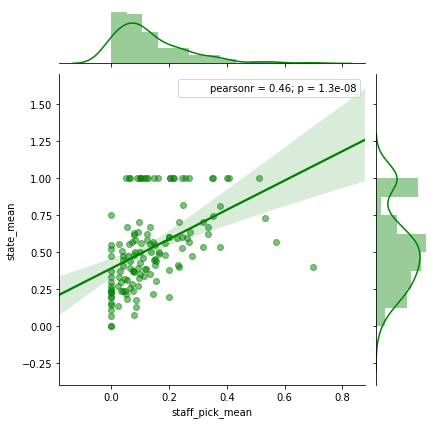

In [31]:
ax = sns.jointplot(x='staff_pick_mean',y='state_mean', kind='reg',color='g',data=scd,scatter_kws={'alpha':0.5})

# plt.tight_layout()
plt.savefig("charts/staffpickvssuccess.png")

In [32]:
# scd_1 = scd[scd['goal_mean'] < 10000]
# g = sns.JointGrid(x="goal_mean", y="state_mean", data=scd_1)
# g = g.plot_joint(plt.scatter, color="m", edgecolor="white")
# _ = g.ax_marg_x.hist(scd['goal_mean'], color="b", alpha=.6,bins=np.arange(0, 10000, 500))
# _ = g.ax_marg_y.hist(scd['state_mean'], color="r", alpha=.6,orientation="horizontal",bins=np.arange(0, 1, 0.1))



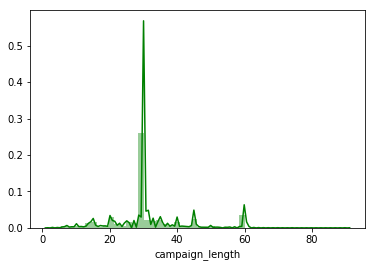

In [33]:
sns.distplot(df['campaign_length'],color='g');

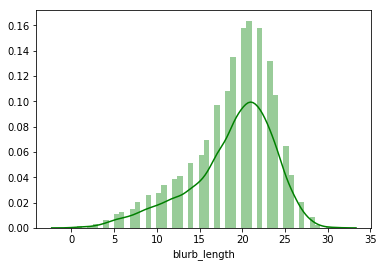

In [34]:
sns.distplot(df['blurb_length'],color='g');

In [35]:
state_dict = {}
state_list = [('Fail',0),('Success',1),('All','All')]

for state in state_list:
    if state[0] == 'All':
        df_c = df
    else:
        df_c = df[df['state'] == state[1]]
    df_c = df_c.dropna()
    state_mean = df_c['state'].mean()
    backers_mean = df_c['backers_count'].mean()
    pledged_mean = df_c['usd_pledged'].mean()
    goal_mean = df_c['usd_goal'].mean()
    campaign_mean = df_c['campaign_length'].mean()
    staff_pick_mean = df_c['staff_pick'].mean()
    blurb_mean = df_c['blurb_length'].mean()
    
    state_total = df_c['state'].sum()
    backers_total = df_c['backers_count'].sum()
    pledged_total = df_c['usd_pledged'].sum()
    goal_total = df_c['usd_goal'].sum()
    pct_goal_achieved = pledged_total/goal_total
    
    state_dict[state[0]] = {"state_mean":state_mean, "backers_mean": backers_mean, "pledged_mean":pledged_mean, 
                         "goal_mean":goal_mean, "campaign_mean":campaign_mean, "staff_pick_mean":staff_pick_mean, 
                         "blurb_mean":blurb_mean, "state_total": state_total, "backers_total":backers_total,
                            "pledged_total":pledged_total,"goal_total":goal_total,"pct_goal_achieved": pct_goal_achieved}

In [36]:
sd = pd.DataFrame(state_dict).T
sd

,backers_mean,backers_total,blurb_mean,campaign_mean,goal_mean,goal_total,pct_goal_achieved,pledged_mean,pledged_total,staff_pick_mean,state_mean,state_total
All,144.765858,1145677.0,18.785823,31.448319,39138.831590,3.097447e+08,0.351758,13767.395239,1.089552e+08,0.141142,0.619661,4904.0
Fail,17.669767,53186.0,19.065116,33.707309,88527.435465,2.664676e+08,0.016565,1466.495770,4.414152e+06,0.031894,0.000000,0.0
Success,222.775489,1092491.0,18.614396,30.061786,8824.863878,4.327713e+07,2.415618,21317.498705,1.045410e+08,0.208197,1.000000,4904.0


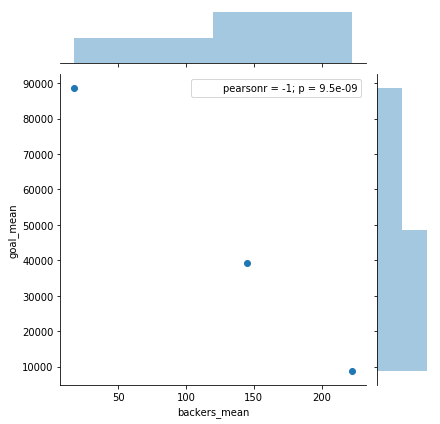

In [37]:
sns.jointplot(x='backers_mean',y='goal_mean', data=sd)

In [38]:
# ax = sns.swarmplot(x="state", y="staff_pick", data=df)

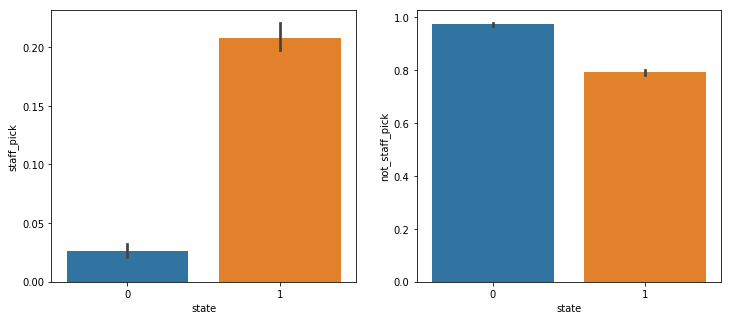

In [39]:
df['not_staff_pick'] = df['staff_pick'].replace({0:1,1:0})

fig,ax = plt.subplots(1,2,figsize=(12,5))
ax = plt.subplot(121)
ax = sns.barplot(x='state',y='staff_pick', data=df)

ax = plt.subplot(122)
ax = sns.barplot(x='state',y='not_staff_pick', data=df)

In [40]:
# g = sns.factorplot(x="state", y="backers_count",hue="staff_pick", col="usd_pledged",data=df, kind="bar",size=4, aspect=.7);

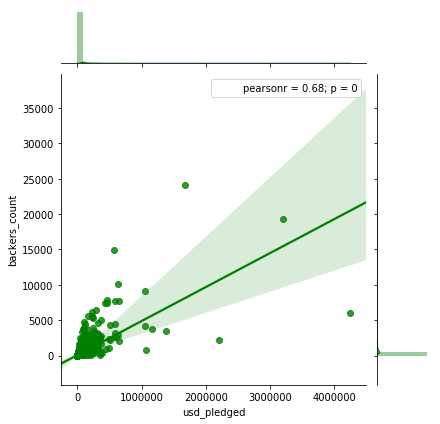

In [41]:
sns.jointplot(x='usd_pledged',y='backers_count', color='g',data=df, kind='reg')

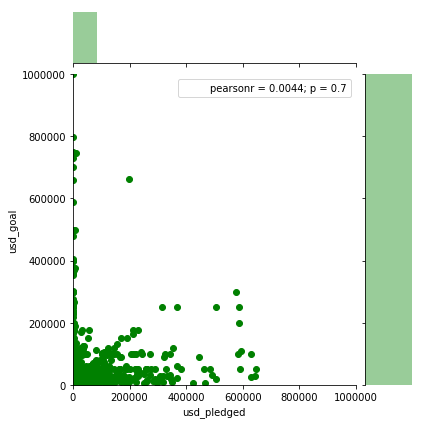

In [42]:
sns.jointplot(x='usd_pledged',y='usd_goal', xlim=(0,1000000),ylim=(0,1000000),color='g',data=df)

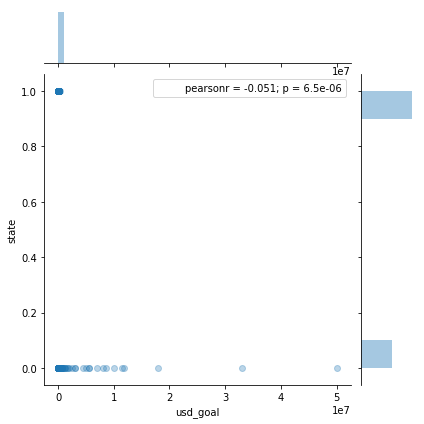

In [43]:
# sns.jointplot(x='usd_pledged',y='state',alpha=0.5,data=df)

sns.jointplot(x='usd_goal',y='state',alpha=0.3,data=df, kind='scatter')
# sns.jointplot(x='usd_goal',y='state',data=df, kind='reg')
# sns.jointplot(x='usd_goal',y='state',data=df, kind='resid')
# sns.jointplot(x='usd_goal',y='state',data=df, kind='kde')
# sns.jointplot(x='usd_goal',y='state',data=df, kind='hex')

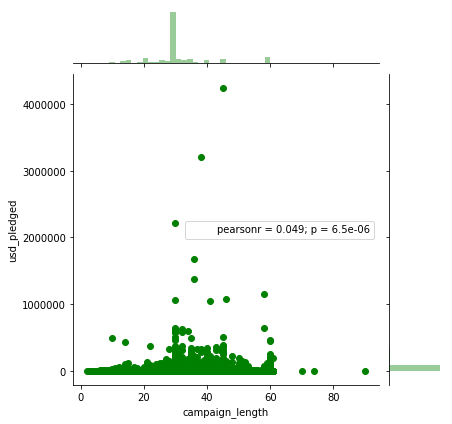

In [44]:
sns.jointplot(x='campaign_length',y='usd_pledged', color='g',data=df)

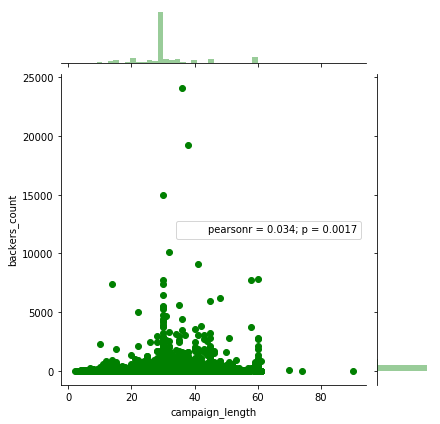

In [45]:
sns.jointplot(x='campaign_length',y='backers_count', color='g',data=df)

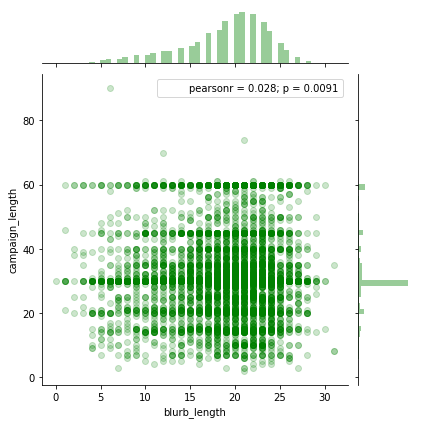

In [46]:
sns.jointplot(x='blurb_length',y='campaign_length',alpha=0.2, color='g',data=df)

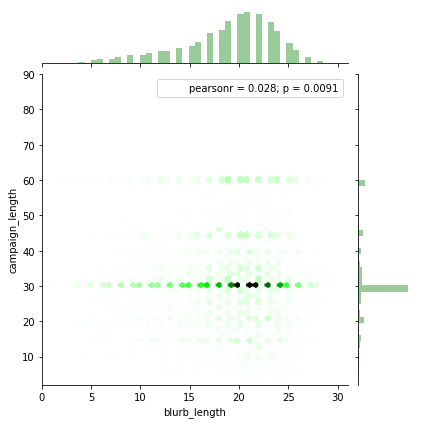

In [47]:
sns.jointplot(x='blurb_length',y='campaign_length',kind='hex',color='g',data=df)

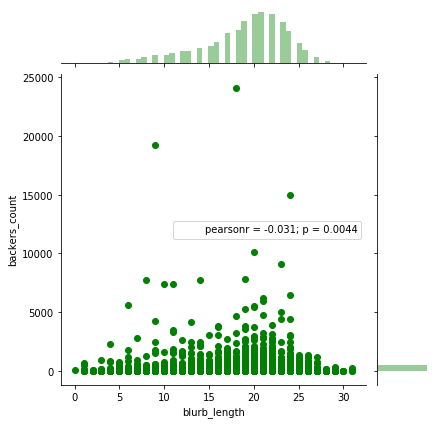

In [48]:
sns.jointplot(x='blurb_length',y='backers_count',color='g', data=df)

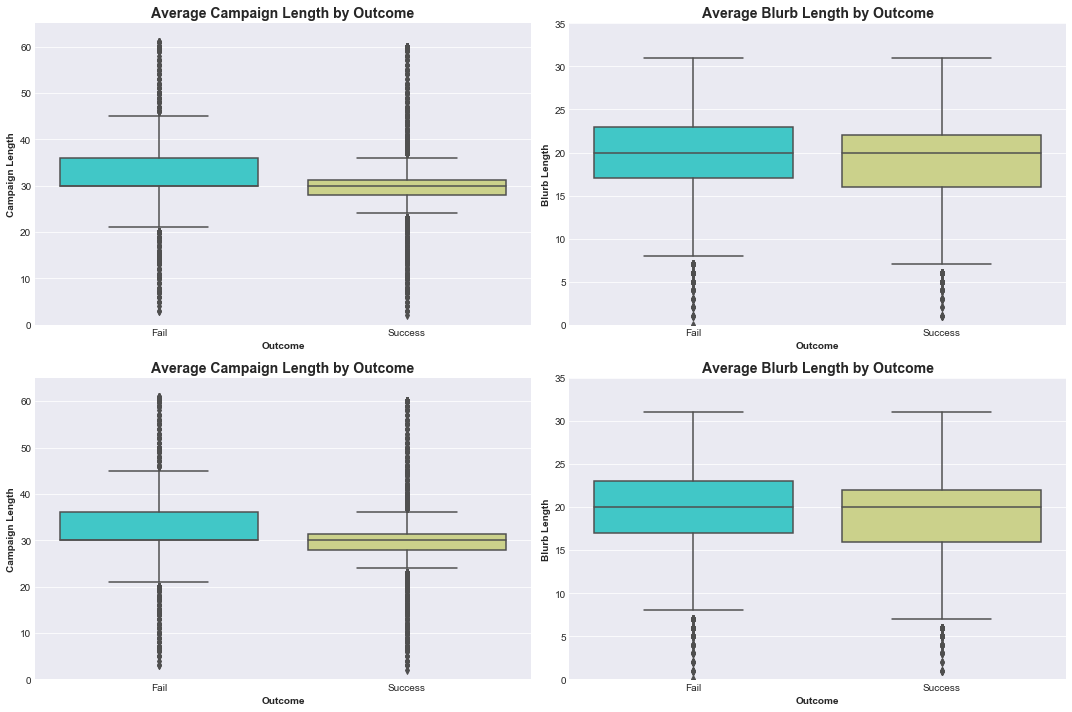

In [106]:
fig,ax = plt.subplots(figsize=(15,10),nrows=2,ncols=2)
ax = plt.subplot(221)
ax = sns.boxplot(x='state',y='campaign_length',data=df,palette='rainbow')
ax.set_ylim([0, 65]) 
ax.set_xlabel("Outcome",fontweight='bold')
ax.set_ylabel("Campaign Length",fontweight='bold')
ax.set_xticklabels(['Fail','Success'])
plt.title("Average Campaign Length by Outcome",fontweight='bold',fontsize=14)

ax = plt.subplot(222)
ax = sns.boxplot(x='state',y='blurb_length',data=df,palette='rainbow')
ax.set_ylim([0, 35]) 
ax.set_xlabel("Outcome",fontweight='bold')
ax.set_ylabel("Blurb Length",fontweight='bold')
ax.set_xticklabels(['Fail','Success'])
plt.title("Average Blurb Length by Outcome",fontweight='bold',fontsize=14)

ax = plt.subplot(223)
ax = sns.boxplot(x='state',y='campaign_length',data=df,palette='rainbow')
ax.set_ylim([0, 65]) 
ax.set_xlabel("Outcome",fontweight='bold')
ax.set_ylabel("Campaign Length",fontweight='bold')
ax.set_xticklabels(['Fail','Success'])
plt.title("Average Campaign Length by Outcome",fontweight='bold',fontsize=14)

ax = plt.subplot(224)
ax = sns.boxplot(x='state',y='blurb_length',data=df,palette='rainbow')
ax.set_ylim([0, 35]) 
ax.set_xlabel("Outcome",fontweight='bold')
ax.set_ylabel("Blurb Length",fontweight='bold')
ax.set_xticklabels(['Fail','Success'])
plt.title("Average Blurb Length by Outcome",fontweight='bold',fontsize=14)

plt.tight_layout()
plt.savefig("charts/statestaffpickcategorycountry.png")

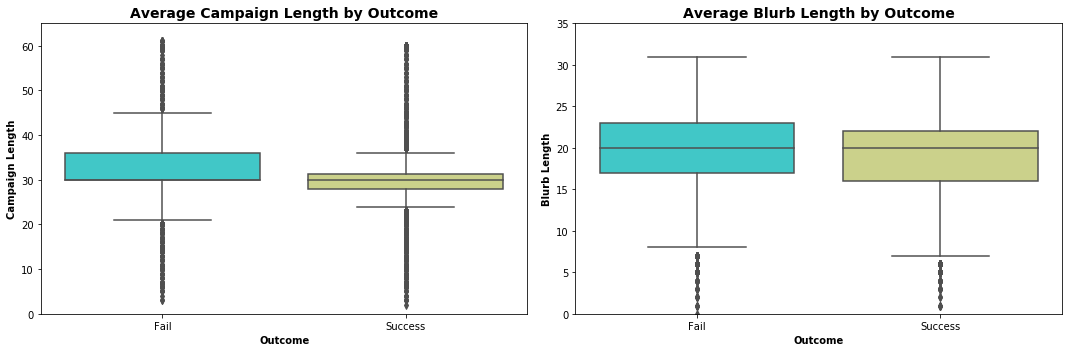

In [49]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax = plt.subplot(121)
ax = sns.boxplot(x='state',y='campaign_length',data=df,palette='rainbow')
ax.set_ylim([0, 65]) 
ax.set_xlabel("Outcome",fontweight='bold')
ax.set_ylabel("Campaign Length",fontweight='bold')
ax.set_xticklabels(['Fail','Success'])
plt.title("Average Campaign Length by Outcome",fontweight='bold',fontsize=14)

ax = plt.subplot(122)
ax = sns.boxplot(x='state',y='blurb_length',data=df,palette='rainbow')
ax.set_ylim([0, 35]) 
ax.set_xlabel("Outcome",fontweight='bold')
ax.set_ylabel("Blurb Length",fontweight='bold')
ax.set_xticklabels(['Fail','Success'])
plt.title("Average Blurb Length by Outcome",fontweight='bold',fontsize=14)
plt.tight_layout()
plt.savefig("charts/campaignblurblengthstate.png")

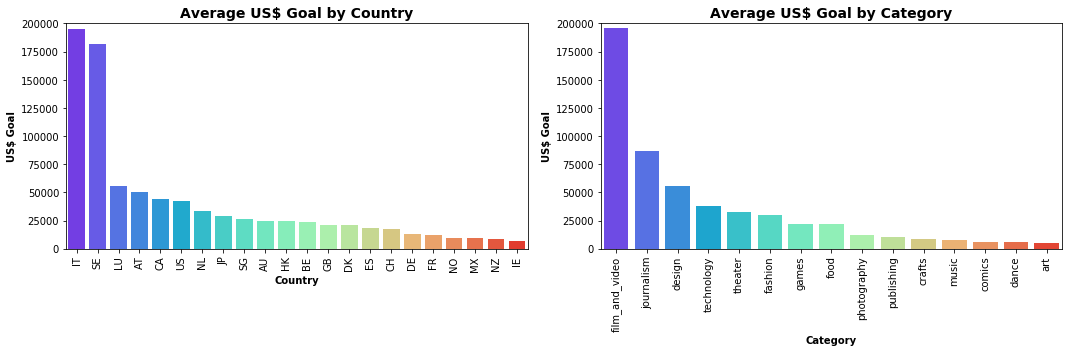

In [50]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax = plt.subplot(121)
cd_2 = cd.sort_values(['goal_mean'], ascending=[False])
ax = sns.barplot(x='country',y='goal_mean',data=cd_2,palette='rainbow')
ax.set_ylim([0, 200000]) 
ax.set_xlabel("Country",fontweight='bold')
ax.set_ylabel("US$ Goal",fontweight='bold')
plt.xticks(rotation=90)
plt.title("Average US$ Goal by Country",fontweight='bold',fontsize=14)

ax = plt.subplot(122)
mcd_2 = mcd.sort_values(['goal_mean'], ascending=[False])
ax = sns.barplot(x='category',y='goal_mean',data=mcd_2,palette='rainbow')
ax.set_ylim([0, 200000]) 
ax.set_xlabel("Category",fontweight='bold')
ax.set_ylabel("US$ Goal",fontweight='bold')
plt.xticks(rotation=90)
plt.title("Average US$ Goal by Category",fontweight='bold',fontsize=14)

plt.tight_layout()
plt.savefig("charts/goalcountrycategory.png")

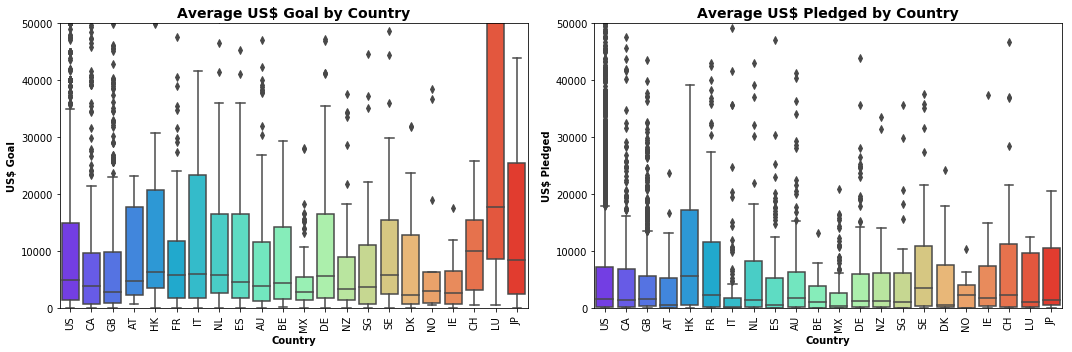

In [51]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax = plt.subplot(121)
ax = sns.boxplot(x='country',y='usd_goal',data=df,palette='rainbow')
ax.set_ylim([0, 50000]) 
ax.set_xlabel("Country",fontweight='bold')
ax.set_ylabel("US$ Goal",fontweight='bold')
plt.xticks(rotation=90)

plt.title("Average US$ Goal by Country",fontweight='bold',fontsize=14)

ax = plt.subplot(122)
ax = sns.boxplot(x='country',y='usd_pledged',data=df,palette='rainbow')
ax.set_ylim([0, 50000]) 
ax.set_xlabel("Country",fontweight='bold')
ax.set_ylabel("US$ Pledged",fontweight='bold')
plt.xticks(rotation=90)

plt.title("Average US$ Pledged by Country",fontweight='bold',fontsize=14)
plt.tight_layout()
plt.savefig("charts/goalpledgedcountry.png")

In [52]:
# df['state'] = df['state'].replace({'Fail':0,'Success':1}).astype(int)
# type(df['state'].iloc[0])

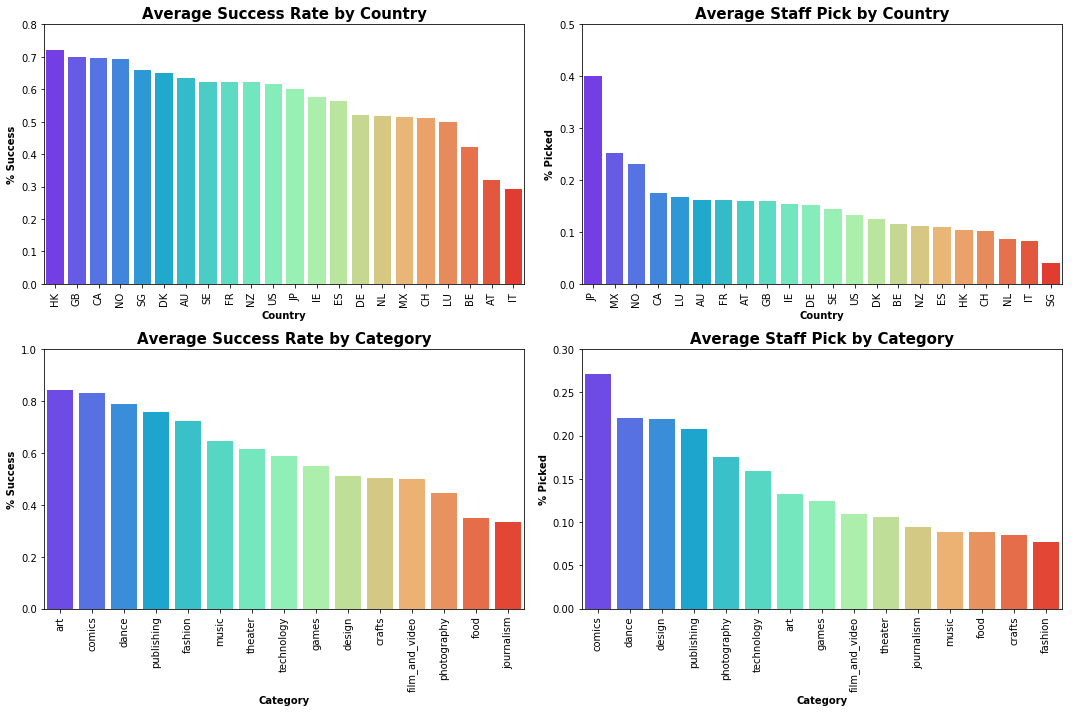

In [53]:
fig,ax = plt.subplots(figsize=(15,10),nrows=2,ncols=2)
ax = plt.subplot(221)

cd_t = cd.sort_values(['state_mean'], ascending=[False])
ax = sns.barplot(x='country',y='state_mean',data=cd_t,palette='rainbow')
ax.set_ylim([0, 0.8]) 
ax.set_xlabel("Country",fontweight='bold')
ax.set_ylabel("% Success",fontweight='bold')
plt.xticks(rotation=90)

plt.title("Average Success Rate by Country",fontweight='bold',fontsize=15)

ax = plt.subplot(222)
cd_u = cd.sort_values(['staff_pick_mean'], ascending=[False])
ax = sns.barplot(x='country',y='staff_pick_mean',data=cd_u,palette='rainbow')
ax.set_ylim([0, 0.5]) 
ax.set_xlabel("Country",fontweight='bold')
ax.set_ylabel("% Picked",fontweight='bold')
plt.xticks(rotation=90)

plt.title("Average Staff Pick by Country",fontweight='bold',fontsize=15)

ax = plt.subplot(223)

mc_1 = mcd.sort_values(['state_mean'], ascending=[False])
ax = sns.barplot(x='category',y='state_mean',data=mc_1,palette='rainbow')
ax.set_ylim([0, 1]) 
ax.set_xlabel("Category",fontweight='bold')
ax.set_ylabel("% Success",fontweight='bold')
plt.xticks(rotation=90)

plt.title("Average Success Rate by Category",fontweight='bold',fontsize=15)

ax = plt.subplot(224)
mc_2 = mcd.sort_values(['staff_pick_mean'], ascending=[False])
ax = sns.barplot(x='category',y='staff_pick_mean',data=mc_2,palette='rainbow')
ax.set_ylim([0, 0.3]) 
ax.set_xlabel("Category",fontweight='bold')
ax.set_ylabel("% Picked",fontweight='bold')
plt.xticks(rotation=90)

plt.title("Average Staff Pick by Category",fontweight='bold',fontsize=15)
plt.tight_layout()
plt.savefig("charts/statestaffpickcategorycountry.png")

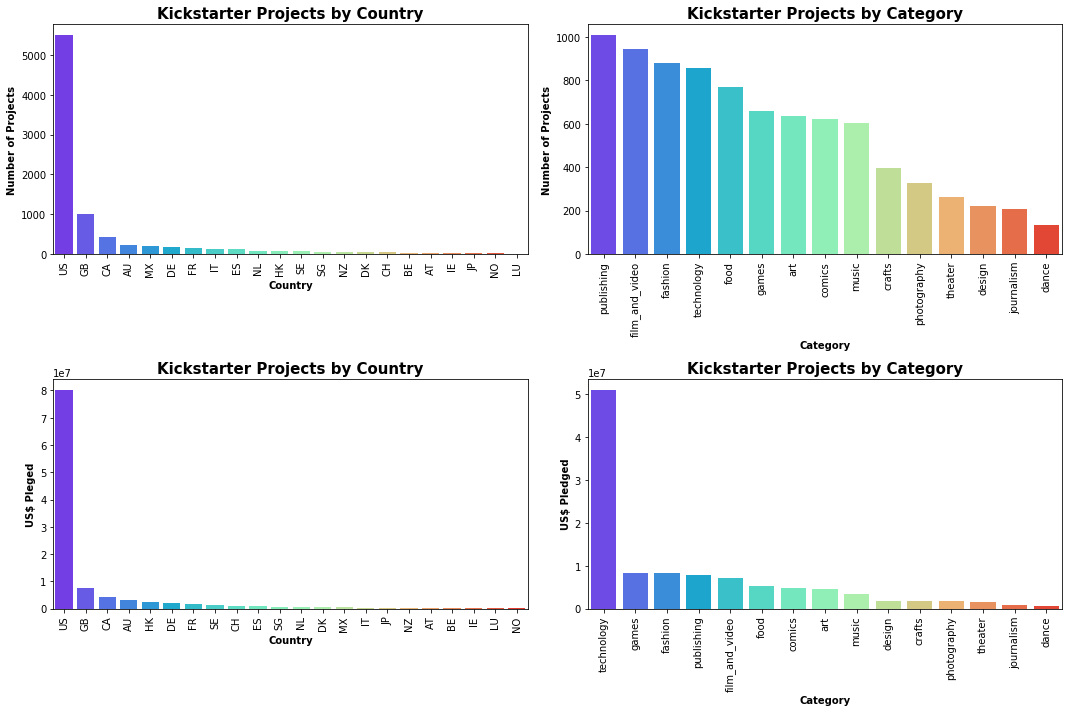

In [54]:
fig,ax = plt.subplots(figsize=(15,10),nrows=2,ncols=2)
ax = plt.subplot(221)
df_1 = df['country'].value_counts()
df_1 = pd.DataFrame(df_1)
df_1 = df_1.rename(columns={'country': 'count'})
df_1['country'] = df_1.index
ax = sns.barplot(x="country",y="count",data=df_1,palette='rainbow')
ax.set_xlabel("Country",fontweight='bold')
ax.set_ylabel("Number of Projects",fontweight='bold')
plt.xticks(rotation=90)
plt.title("Kickstarter Projects by Country",fontweight='bold',fontsize=15)

ax = plt.subplot(222)
df_2 = df['category_main'].value_counts()
df_2 = pd.DataFrame(df_2)
df_2 = df_2.rename(columns={'category_main': 'count'})
df_2['category_main'] = df_2.index
ax = sns.barplot(x="category_main",y="count",data=df_2,palette='rainbow')
ax.set_xlabel("Category",fontweight='bold')
ax.set_ylabel("Number of Projects",fontweight='bold')
plt.xticks(rotation=90)
plt.title("Kickstarter Projects by Category",fontweight='bold',fontsize=15)

ax = plt.subplot(223)
ax = sns.barplot(x="country",y="pledged_total",data=cd,palette='rainbow')
ax.set_xlabel("Country",fontweight='bold')
ax.set_ylabel("US$ Pleged",fontweight='bold')
plt.xticks(rotation=90)
plt.title("Kickstarter Projects by Country",fontweight='bold',fontsize=15)

ax = plt.subplot(224)
ax = sns.barplot(x="category",y="pledged_total",data=mcd,palette='rainbow')
ax.set_xlabel("Category",fontweight='bold')
ax.set_ylabel("US$ Pledged",fontweight='bold')
plt.xticks(rotation=90)
plt.title("Kickstarter Projects by Category",fontweight='bold',fontsize=15)
plt.tight_layout()
plt.savefig("charts/totalcountrycategory.png")

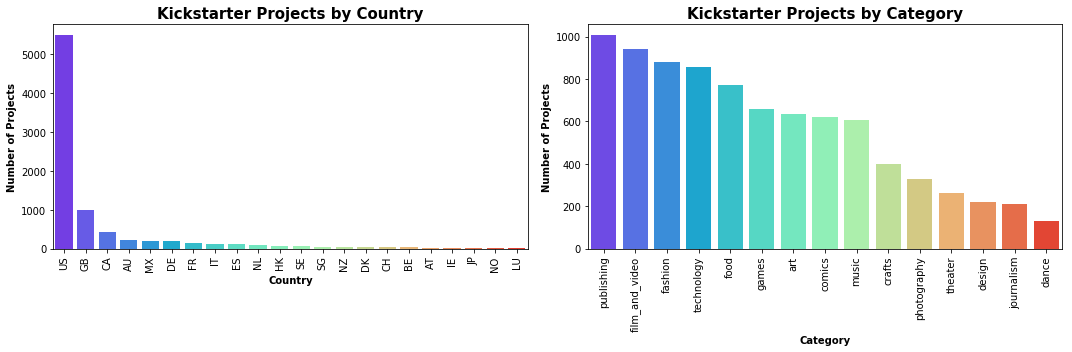

In [55]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax = plt.subplot(121)
df_1 = df['country'].value_counts()
df_1 = pd.DataFrame(df_1)
df_1 = df_1.rename(columns={'country': 'count'})
df_1['country'] = df_1.index
ax = sns.barplot(x="country",y="count",data=df_1,palette='rainbow')
ax.set_xlabel("Country",fontweight='bold')
ax.set_ylabel("Number of Projects",fontweight='bold')
plt.xticks(rotation=90)
plt.title("Kickstarter Projects by Country",fontweight='bold',fontsize=15)

ax = plt.subplot(122)
df_2 = df['category_main'].value_counts()
df_2 = pd.DataFrame(df_2)
df_2 = df_2.rename(columns={'category_main': 'count'})
df_2['category_main'] = df_2.index
ax = sns.barplot(x="category_main",y="count",data=df_2,palette='rainbow')
ax.set_xlabel("Category",fontweight='bold')
ax.set_ylabel("Number of Projects",fontweight='bold')
plt.xticks(rotation=90)
plt.title("Kickstarter Projects by Category",fontweight='bold',fontsize=15)
plt.tight_layout()
plt.savefig("charts/countcategorycountry.png")

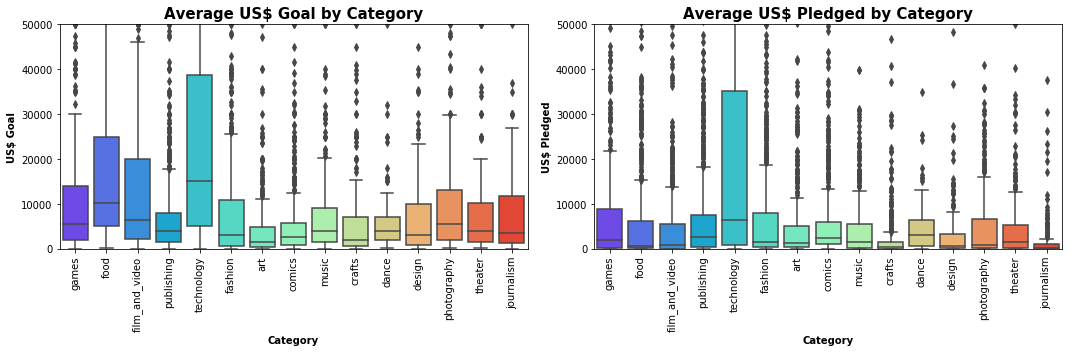

In [56]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax = plt.subplot(121)
ax = sns.boxplot(x='category_main',y='usd_goal',data=df,palette='rainbow')
ax.set_ylim([0, 50000]) 
ax.set_xlabel("Category",fontweight='bold')
ax.set_ylabel("US$ Goal",fontweight='bold')
# ax.set_xticklabels(rotation=45)
plt.xticks(rotation=90)

plt.title("Average US$ Goal by Category",fontweight='bold',fontsize=15)
plt.savefig("charts/goalcategory.png")

ax = plt.subplot(122)
ax = sns.boxplot(x='category_main',y='usd_pledged',data=df,palette='rainbow')
ax.set_ylim([0, 50000]) 
ax.set_xlabel("Category",fontweight='bold')
ax.set_ylabel("US$ Pledged",fontweight='bold')
# ax.set_xticklabels(rotation=45)
plt.xticks(rotation=90)

plt.title("Average US$ Pledged by Category",fontweight='bold',fontsize=15)
plt.tight_layout()
plt.savefig("charts/goalpledgedcategory.png")

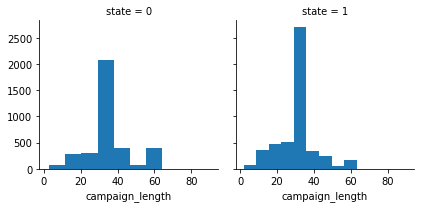

In [57]:
g = sns.FacetGrid(df,col='state')
g.map(plt.hist,'campaign_length')

(0, 60000)

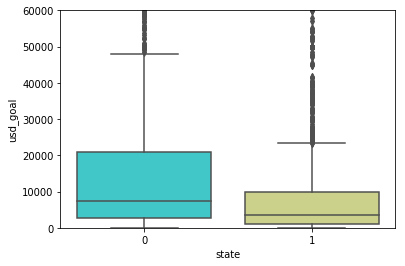

In [58]:
ax = sns.boxplot(x='state',y='usd_goal',data=df,palette='rainbow')
ax.set_ylim([0, 60000])  

(0, 40000)

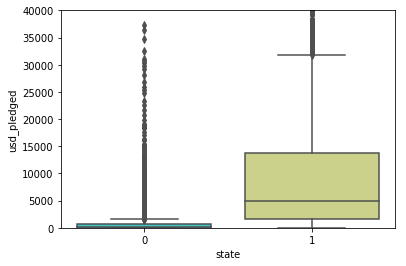

In [59]:
ax = sns.boxplot(x='state',y='usd_pledged',data=df,palette='rainbow')
ax.set_ylim([0, 40000])  

(400, 1000)

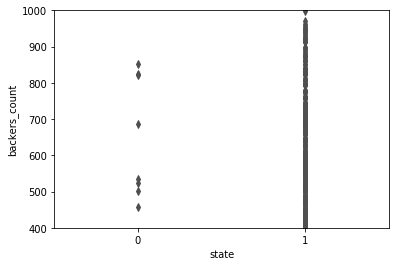

In [60]:
# ax = sns.boxplot(x='state',y='backers_count',data=df,palette='rainbow')
# ax.set_ylim([400, 1000])  

(0, 50000)

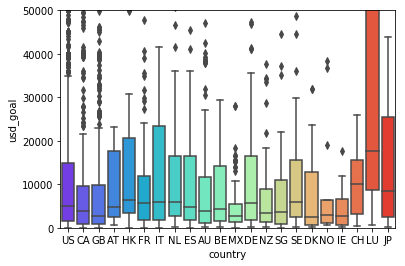

In [61]:
ax = sns.boxplot(x='country',y='usd_goal',data=df,palette='rainbow')
ax.set_ylim([0, 50000]) 

(0, 40000)

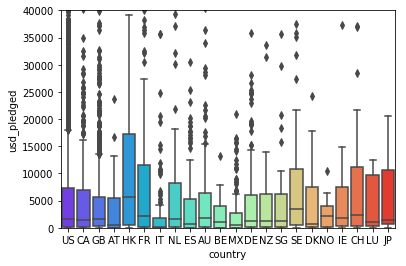

In [62]:
ax = sns.boxplot(x='country',y='usd_pledged',data=df,palette='rainbow')
ax.set_ylim([0, 40000]) 

(0, 1000)

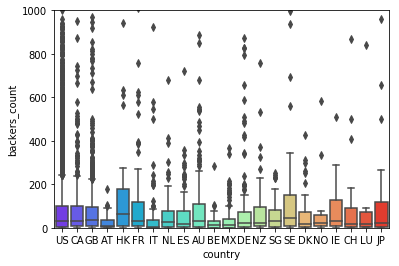

In [63]:
ax = sns.boxplot(x='country',y='backers_count',data=df,palette='rainbow')
ax.set_ylim([0, 1000]) 

(0, 60000)

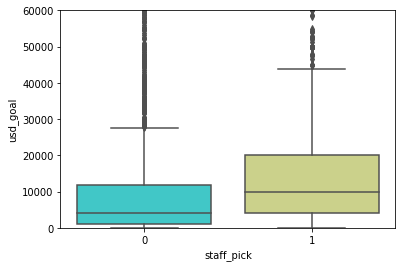

In [64]:
ax = sns.boxplot(x='staff_pick',y='usd_goal',data=df,palette='rainbow')
ax.set_ylim([0, 60000])  

In [65]:
# ax = sns.barplot(x="state", y="staff_pick", hue="state", data=df)
from numpy import median

# ax = sns.barplot(x="state", y="staff_pick", data=df, estimator=median)

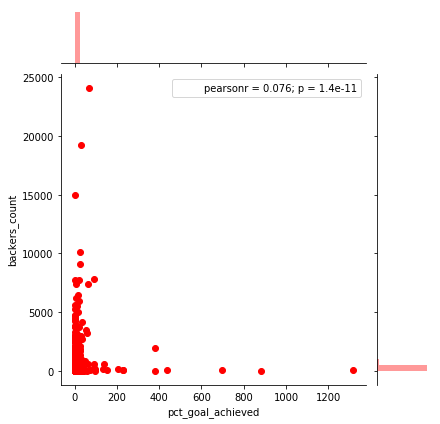

In [66]:
sns.jointplot(x='pct_goal_achieved',y='backers_count',data=df,color='red');

In [67]:
df.columns

Index(['id', 'name', 'state', 'category_main', 'category_name',
       'backers_count', 'pct_goal_achieved', 'usd_pledged', 'usd_goal',
       'country', 'currency', 'campaign_length', 'deadline', 'launched',
       'created', 'staff_pick', 'creator_name', 'blurb_length',
       'not_staff_pick'],
      dtype='object')

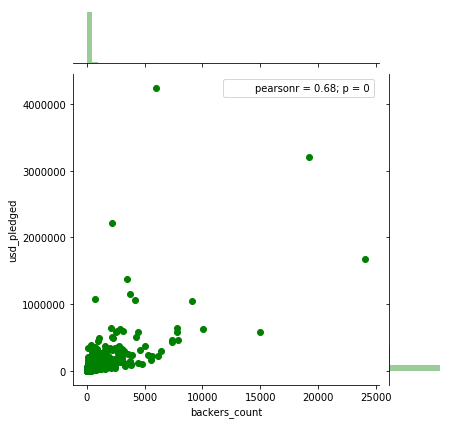

In [68]:
sns.jointplot(x='backers_count',y='usd_pledged',data=df,color='green')

Text(0,0.5,'Frequency')

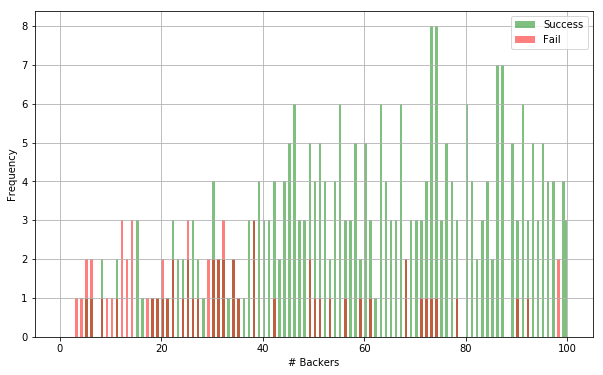

In [69]:
plt.figure(figsize=(10,6))

df[(df['state'] == 1) & (df['staff_pick'] ==1)]['backers_count'].hist(range=(0,100), alpha=0.5,color='g',
                                              bins=200,label='Success')
df[(df['state'] == 0) & (df['staff_pick'] ==1)]['backers_count'].hist(range=(0,100), alpha=0.5,color='r',
                                              bins=200,label='Fail')
plt.legend()
plt.xlabel('# Backers')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

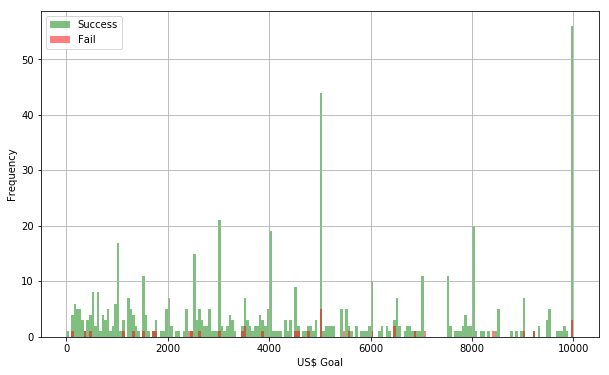

In [70]:
plt.figure(figsize=(10,6))

df[(df['state'] == 1) & (df['staff_pick'] ==1)]['usd_goal'].hist(range=(0,10000), alpha=0.5,color='g',
                                              bins=200,label='Success')
df[(df['state'] == 0) & (df['staff_pick'] ==1)]['usd_goal'].hist(range=(0,10000), alpha=0.5,color='r',
                                              bins=200,label='Fail')
plt.legend()
plt.xlabel('US$ Goal')
plt.ylabel('Frequency')

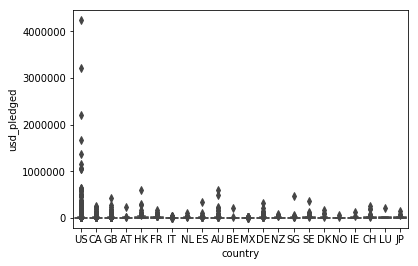

In [71]:
sns.boxplot(x="country",y="usd_pledged",data=df)

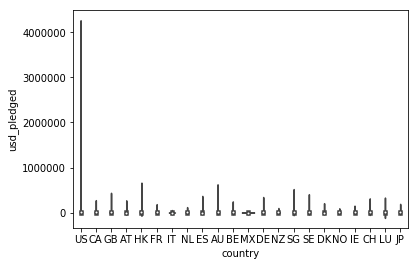

In [72]:
sns.violinplot(x='country', y='usd_pledged', data=df)

In [73]:
# sns.swarmplot(x='country', y='usd_pledged', data=df)

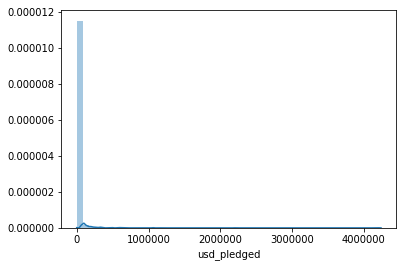

In [74]:
# sns.distplot(df.usd_pledged)

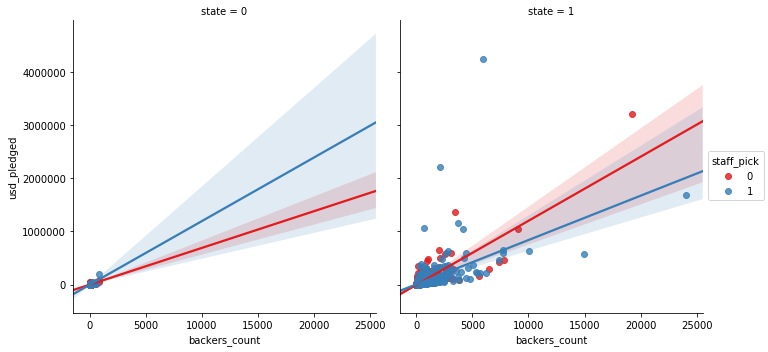

In [75]:
plt.figure(figsize=(11,7))
sns.lmplot(y='usd_pledged',x='backers_count',data=df,hue='staff_pick',
           col='state',palette='Set1')

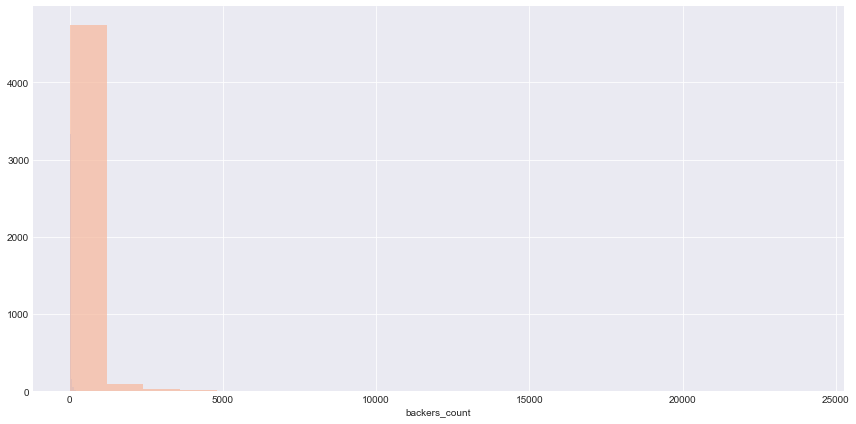

In [76]:
# sns.set_style('darkgrid')
# g = sns.FacetGrid(df,hue="state",palette='coolwarm',size=6,aspect=2)
# g = g.map(plt.hist,'backers_count',bins=20,alpha=0.7)

Text(0,0.5,'Frequency')

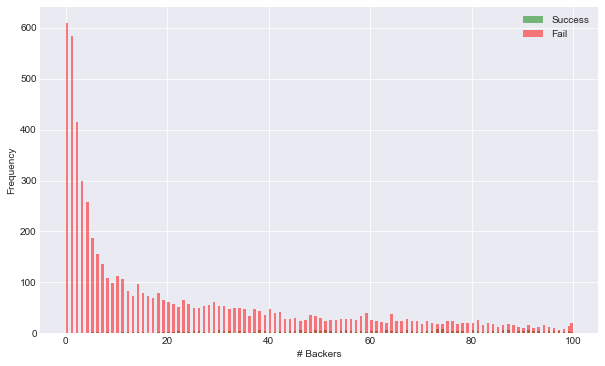

In [77]:
plt.figure(figsize=(10,6))
df[df['staff_pick']==1]['backers_count'].hist(range=(0,100), alpha=0.5,color='g',
                                              bins=200,label='Success')
df[df['staff_pick']==0]['backers_count'].hist(range=(0,100), alpha=0.5,color='r',
                                              bins=200,label='Fail')
plt.legend()
plt.xlabel('# Backers')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

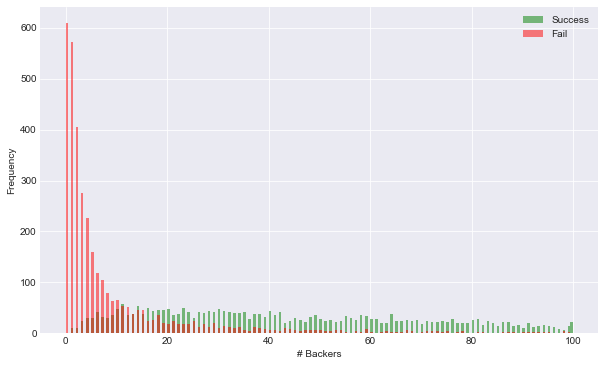

In [78]:
plt.figure(figsize=(10,6))
df[df['state']==1]['backers_count'].hist(range=(0,100), alpha=0.5,color='g',
                                              bins=200,label='Success')
df[df['state']==0]['backers_count'].hist(range=(0,100), alpha=0.5,color='r',
                                              bins=200,label='Fail')
plt.legend()
plt.xlabel('# Backers')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

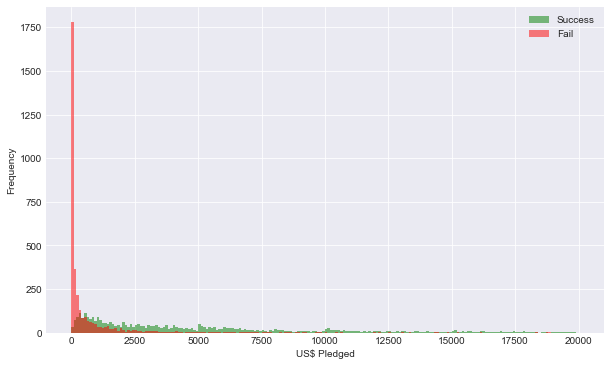

In [79]:
plt.figure(figsize=(10,6))
df[df['state']==1]['usd_pledged'].hist(range=(0,20000), alpha=0.5,color='g',
                                              bins=200,label='Success')
df[df['state']==0]['usd_pledged'].hist(range=(0,20000), alpha=0.5,color='r',
                                              bins=200,label='Fail')
plt.legend()
plt.xlabel('US$ Pledged')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

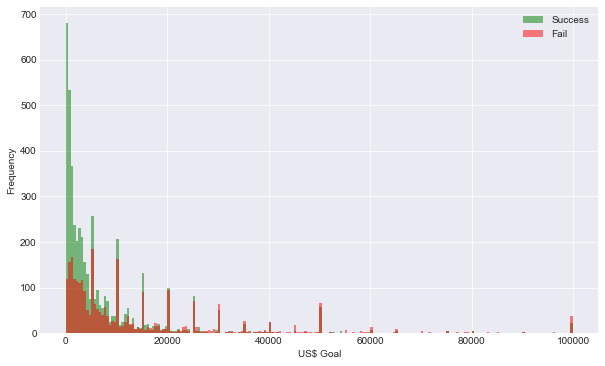

In [80]:
plt.figure(figsize=(10,6))
df[df['state']==1]['usd_goal'].hist(range=(0,100000), alpha=0.5,color='g',
                                              bins=200,label='Success')
df[df['state']==0]['usd_goal'].hist(range=(0,100000), alpha=0.5,color='r',
                                              bins=200,label='Fail')
plt.legend()
plt.xlabel('US$ Goal')
plt.ylabel('Frequency')

In [81]:
# sns.set_style('whitegrid')
# df['pct_goal_achieved'].hist(bins=3000)
# plt.xlabel('pct_goal_achieved')
# # sns.plt.ylim(0,)
# plt.xlim(0,10)

In [82]:
df.staff_pick.sum()

1117

(2, 2)


Text(0,0.5,'Number of Campaigns')

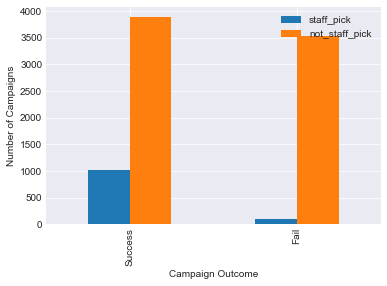

In [83]:
df['not_staff_pick'] = df['staff_pick'].replace({0: 1, 1:0})
df['state'] = df['state'].replace({0: "Fail", 1:"Success"})
# df['total'] = df['staff_pick'] + df['not_staff_pick']
df_staff_pick = df.groupby(["state"]).sum().sort_values(['staff_pick'], ascending=[False])
df_staff_pick = pd.DataFrame(df_staff_pick, columns={'staff_pick','not_staff_pick'})
print(df_staff_pick.shape)
df_staff_pick.plot(kind='bar')
# plt.plot(df_staff_pick, label='stuff')
plt.xlabel('Campaign Outcome')
plt.ylabel('Number of Campaigns')

In [84]:
# ax = sns.barplot(x="state", y='staff_pick', data=df)

# plt.xlabel('state', fontsize=12)
# plt.ylabel('staff_pick', fontsize=12)
# plt.tight_layout()
# # plt.savefig('charts/Top20.png')
# plt.show()

In [85]:
df_state = df.groupby(["state"]).count().sort_values(['name'], ascending=[False])
df_state = pd.DataFrame(df_state, columns={'name'})
print(df_state.shape)
df_state

(2, 1)


,name
state,
Success,4904
Fail,3620


(22, 2)


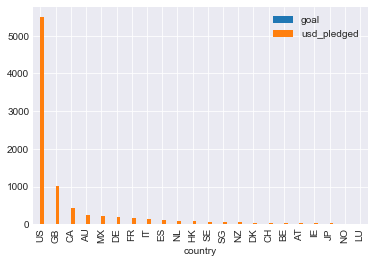

In [86]:
df_state = df.groupby(["country"]).count().sort_values(['state'], ascending=[False])
df_state = pd.DataFrame(df_state, columns={'usd_pledged','goal'})
print(df_state.shape)
df_state.plot(kind='bar')

(2, 2)


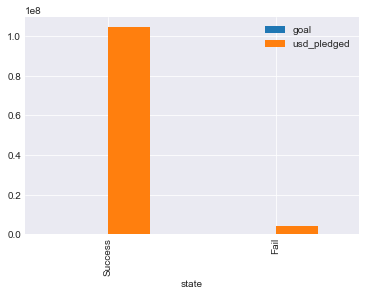

In [87]:
df_state = df.groupby(["state"]).sum().sort_values(['usd_pledged'], ascending=[False])
df_state = pd.DataFrame(df_state, columns={'usd_pledged','goal'})
print(df_state.shape)
df_state.plot(kind='bar')

(2, 1)


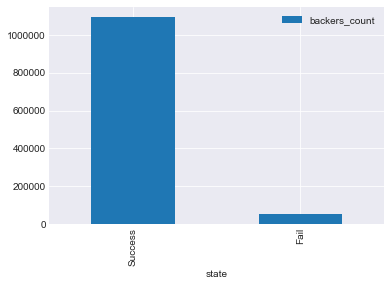

In [88]:
df_state = df.groupby(["state"]).sum().sort_values(['backers_count'], ascending=[False])
df_state = pd.DataFrame(df_state, columns={'backers_count'})
print(df_state.shape)
df_state.plot(kind='bar')

(44, 1)


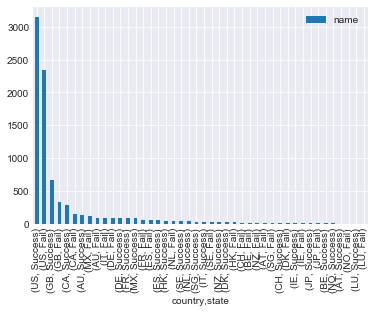

In [89]:
df_country = df.groupby(["country","state"]).count().sort_values(['name'], ascending=[False])
df_country = pd.DataFrame(df_country, columns={'name'})
print(df_country.shape)
df_country.plot(kind='bar')
plt.figsize=(20,10)

(44, 2)


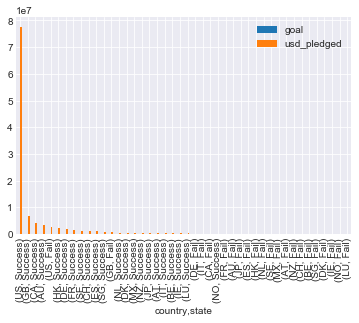

In [90]:
df_country = df.groupby(["country","state"]).sum().sort_values(['usd_pledged'], ascending=[False])
df_country = pd.DataFrame(df_country, columns={'usd_pledged','goal'})
print(df_country.shape)
df_country.plot(kind='bar')

(248, 1)


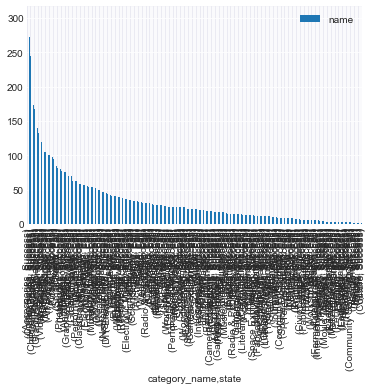

In [91]:
df_main_category = df.groupby(["category_name","state"]).count().sort_values(['name'], ascending=[False])
df_main_category = pd.DataFrame(df_main_category, columns={'name'})
print(df_main_category.shape)
df_main_category.plot(kind='bar')

(248, 2)


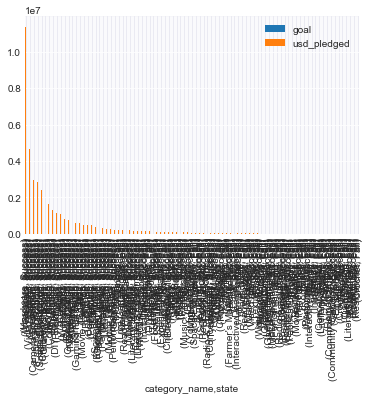

In [92]:
df_main_category = df.groupby(["category_name","state"]).sum().sort_values(['usd_pledged'], ascending=[False])
df_main_category = pd.DataFrame(df_main_category, columns={'usd_pledged', 'goal'})
print(df_main_category.shape)
df_main_category.plot(kind='bar')

In [93]:
# https://github.com/sagarvadher/KickstarterSuccessRatePredicton/blob/master/Kickstarter.ipynb
# from sklearn.base import BaseEstimator
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score
# # from graphviz import Source
# from sklearn import tree

In [94]:
# my_decisiontree = DecisionTreeClassifier( random_state = 100,max_depth=2)
# my_decisiontree.fit(X_train, y_train)
# y_predict = my_decisiontree.predict(X_test)
# score = accuracy_score(y_test, y_predict)
# print(score)

In [95]:
# feature_names = list(feature_matrix)
# Source( tree.export_graphviz(my_decisiontree, out_file=None, feature_names=feature_names))

In [96]:
# from sklearn import linear_model
# clf = linear_model.SGDClassifier()
# clf.fit(X_train, y_train)

# y_predict = clf.predict(X_test)
# score = accuracy_score(y_test, y_predict)
# print(score)

In [97]:
# df.columns

Text(0,0.5,'Number of Projects')

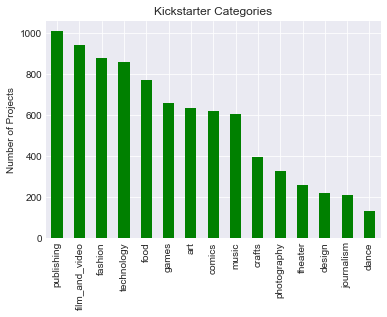

In [98]:
# https://github.com/gagejustins/Kickstarter/blob/master/kickstarter.ipynb
df['category_main'].value_counts().plot(kind='bar', color='g')
plt.title('Kickstarter Categories')
plt.ylabel('Number of Projects')

Text(0,0.5,'Number of Projects')

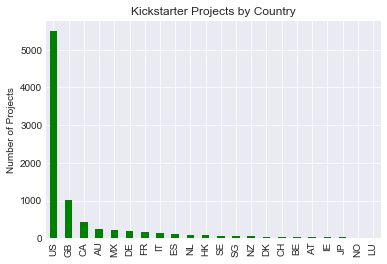

In [99]:
df['country'].value_counts().plot(kind='bar', color='g')
plt.title('Kickstarter Projects by Country')
plt.ylabel('Number of Projects')

Text(0,0.5,'Pledged / Goal Ratio')

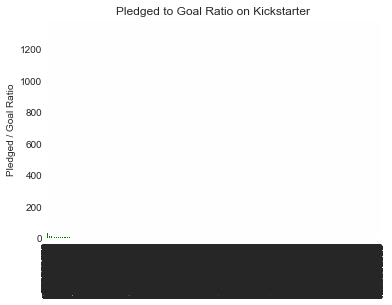

In [100]:
df['pct_goal_achieved'].sort_values(ascending=False).plot(kind='bar', color='g')
plt.title('Pledged to Goal Ratio on Kickstarter')
plt.xlabel('')
plt.ylabel('Pledged / Goal Ratio')

In [101]:
# color = ['r', 'g']

# df.groupby('category_main').status.value_counts(normalize = True).sort_index().plot(kind = 'bar', color = color, figsize=(20, 6))

Text(0.5,1,'Successful Kickstarters have on average lower Goals')

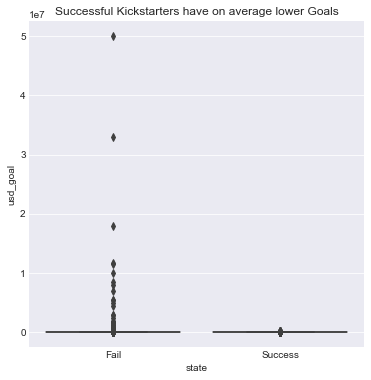

In [102]:
plt.figure(figsize = (6,6))
sns.boxplot(x ='state', y = 'usd_goal', data = df)
plt.title('Successful Kickstarters have on average lower Goals')

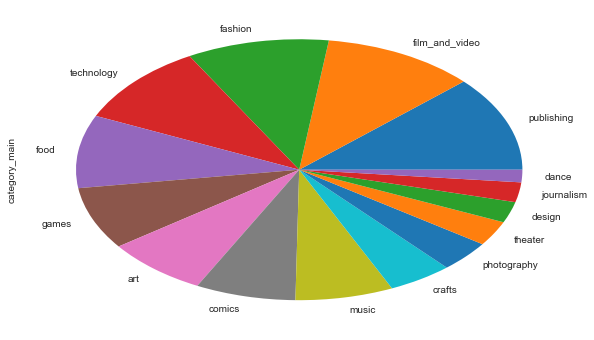

In [103]:
df.category_main.value_counts(normalize = True).plot(kind = 'pie', figsize=(10, 6))

In [104]:
# https://github.com/gagejustins/Kickstarter/blob/master/kickstarter.ipynb
#Projects over time
# kickTime = kick.copy()
# kickTime.set_index('launched', inplace=True)
# grouped = kickTime.resample("A").agg({'ID': np.size})
# grouped.index = grouped.index.year
# grouped.iloc[len(grouped)-8:len(grouped)].plot(kind='bar', color='#2ADC75', legend=None)
# plt.title('Projects Launched')
# plt.xlabel('')

In [105]:
# Resources
# https://github.com/soniakt23/KickstarterFundingPredictor/blob/master/Data%20Analysis.ipynb
# https://github.com/nalamidi/Kickstarter-Predictive-Analysis/blob/master/Kickstarter/Kick-Starter%20Project-Analysis.ipynb